<a href="https://colab.research.google.com/github/avirupk/Deep-Learning/blob/main/Artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking

In [ ]:
pip install keras

In [ ]:
import keras

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
tf.test.is_built_with_cuda()

True

Load data set

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

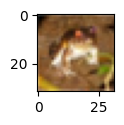

In [ ]:
plot_sample(0)

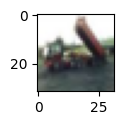

In [ ]:
plot_sample(2
            )

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[2][0]]

'truck'

In [ ]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

preprocessing : scale image

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
y_train_categorical=tf.keras.utils.to_categorical(
    y_train,num_classes=10
)
y_test_categorical=tf.keras.utils.to_categorical(
    y_test,num_classes=10
)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

Model Building

In [ ]:
model=tf.keras.Sequential(
    [
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(3000,activation="relu"),
        tf.keras.layers.Dense(1000,activation="relu"),
        tf.keras.layers.Dense(10,activation="sigmoid")
    ]
)

In [ ]:
model.compile(
    optimizer="SGD",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(x_train,y_train_categorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.3700 - loss: 1.7785


In [ ]:
np.argmax(model.predict(x_test)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


np.int64(3)

In [ ]:
classes[np.argmax(model.predict(x_test)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


'cat'

In [ ]:
classes[y_test[3][0]]

'airplane'

In [ ]:

def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Measure training time on a CPU

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(x_train,y_train_categorical,epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 102ms/step - accuracy: 0.3051 - loss: 1.9298
3min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:

%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 169s 107ms/step - accuracy: 0.3029 - loss: 1.9314
3min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
